<a href="https://colab.research.google.com/github/aasyngier/machine-learning/blob/main/ml_homework1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Homework Assignment: Principal Component Analysis (PCA) on 3D Clustered Data**

-------------------------------

You are provided with a dataset containing 3-dimensional data points from three distinct classes. The dataset can be downloaded from the following link:

**[PCA Three Clusters Dataset](https://github.com/SzymonNowakowski/Machine-Learning-2024/blob/master/PCA_three_clusters_data.csv)**

Each data point is represented by three continuous features $(x, y, z)$ and belongs to one of three clusters.


## **Task & Deliverables**

1. **Colab Notebook**  
   - Create a **Colab notebook** that:
     - Performs PCA on the dataset and visualizes the first two principal components in a 2D scatter plot.
     - Includes separate 2D scatter plots for the original feature pairs: $(x, y)$, $(x, z)$, and $(y, z)$.
     - Clearly **answers** both the **primary** and **secondary** questions.
     - Uses Python code to perform PCA, standardize the data, and generate the required plots.
   - To answer the primary question, you may consider creating additional visualizations or charts beyond those listed above. For example, some students might choose to explore a 3D plot of the data. Feel free to experiment with different approaches.

2. **Publish on GitHub**  
   - Place the Colab notebook in your **GitHub repository** for this course.
   - In your repository’s **README**, add a **link** to the notebook and include an **“Open in Colab”** badge in your notebook, so it can be launched directly from GitHub.

In [8]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

data = pd.read_csv("/content/drive/MyDrive/PCA_three_clusters_data.csv")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
data.head()

,x,y,z,class
0,0.647689,-0.138264,3.512299,0
1,-0.234137,-0.234153,10.769447,0
2,-0.469474,0.767435,11.166721,0
3,-0.465730,-0.463418,3.836479,0
4,-1.724918,-1.913280,1.710932,0


Firstly let's visualize the 3D plot of the three different features

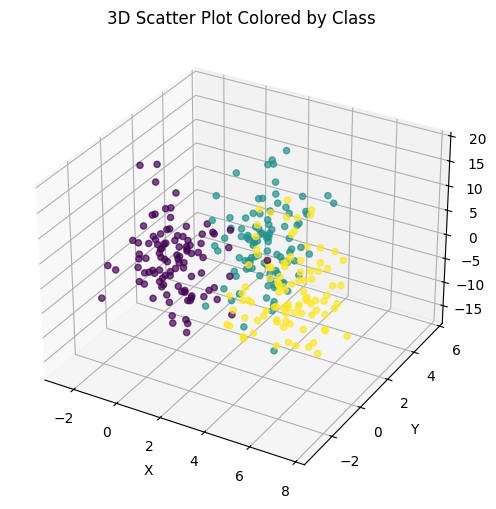

In [15]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(
    data['x'],
    data['y'],
    data['z'],
    c=data['class'],
    cmap='viridis',
    marker='o',
    alpha=0.7
)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('3D Scatter Plot Colored by Class')

plt.show()

At this point we can already see three distinct clusters emerging on the plot.

## **Primary Question**

**Perform PCA on the provided dataset to find the two principal components and visualize the data in a 2D plot using these components.**



In [17]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import numpy as np

data = data.to_numpy()
X = data[:, :3]
targets = data[:, 3]

scaler = StandardScaler()
X = scaler.fit_transform(X)

pca = PCA(n_components = 2)
XV = pca.fit_transform(X)

Now let's take a look at the results of our PCA:

In [18]:
pca.components_

array([[ 0.72005783,  0.56946   , -0.39652494],
       [-0.02368275,  0.59126692,  0.80612813]])

In [21]:
print("\nX projected on V (first 5 rows): \n")
print(XV[:5,:])
print("\nExplained percentage variance: \n")
print(pca.explained_variance_ratio_)
print("\nCumulative explained percentage variance: \n")
print(np.cumsum(pca.explained_variance_ratio_))


X projected on V (first 5 rows): 

[[-1.12582206  0.05986874]
 [-1.89368654  0.95808305]
 [-1.61886158  1.39907438]
 [-1.61654666 -0.01318696]
 [-2.41865284 -0.83294294]]

Explained percentage variance: 

[0.34722276 0.33441835]

Cumulative explained percentage variance: 

[0.34722276 0.68164111]


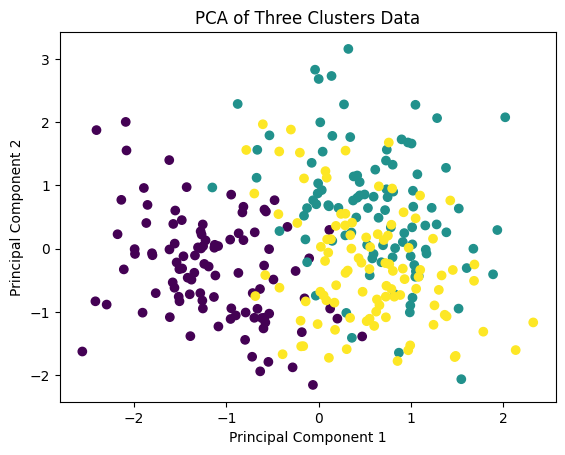

In [22]:
plt.scatter(XV[:, 0], XV[:, 1], c=targets)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Three Clusters Data')
plt.show()

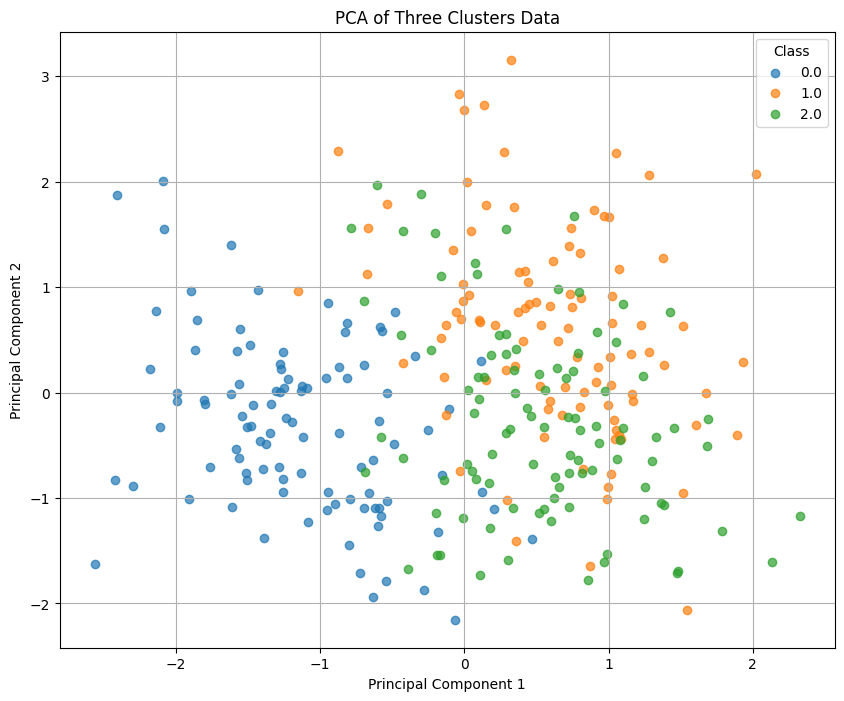

In [24]:

# Plot the PCA results with color coding by wine class
plt.figure(figsize=(10, 8))
for target in np.unique(targets):
    plt.scatter(XV[targets == target, 0], XV[targets == target, 1],
                label=target, alpha=0.7)

plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA of Three Clusters Data")
plt.legend(title="Class")
plt.grid(True)
plt.show()

- Compare this PCA plot with the following 2D plots of the original data:
  - $x$ vs. $y$
  - $x$ vs. $z$
  - $y$ vs. $z$

Now let's compare it with plots of 3 different coordinate pairs.

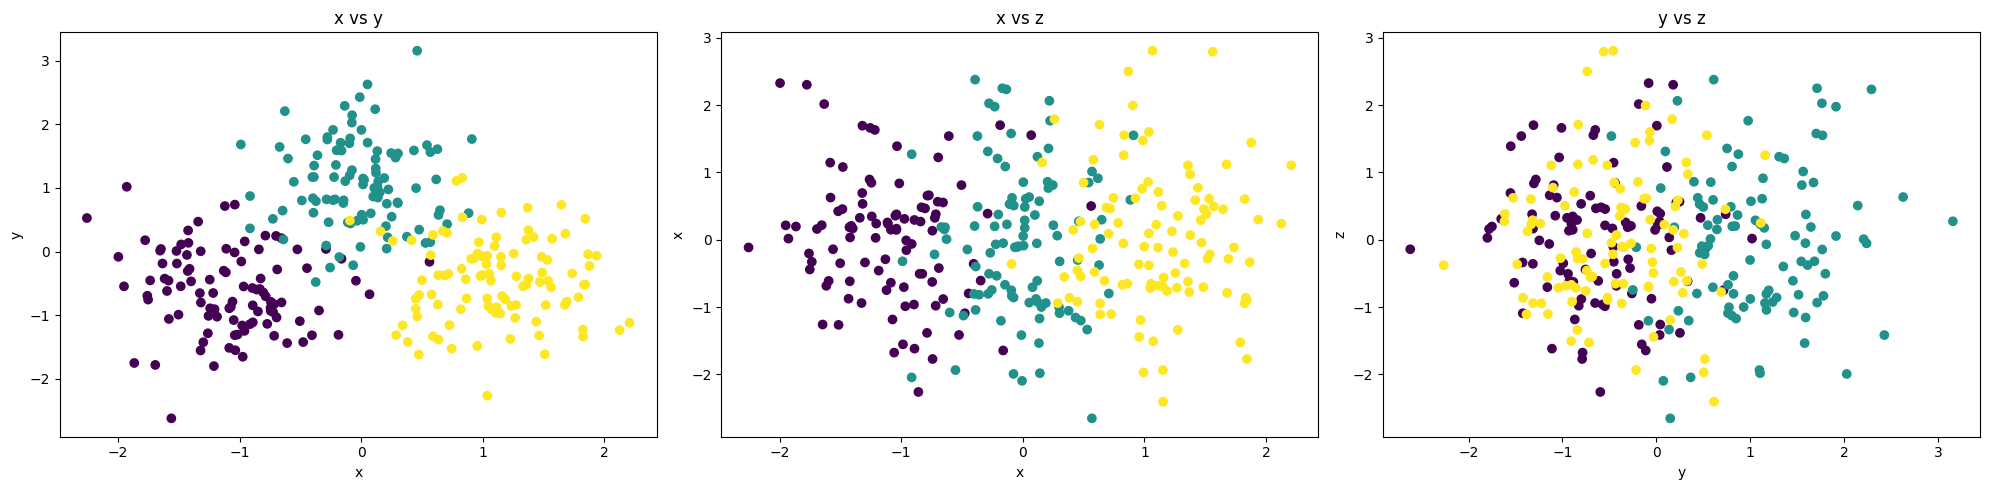

In [6]:
fig, axes = plt.subplots(1, 3, figsize=(20, 5))

axes[0].scatter(X[:, 0], X[:, 1], c=targets)
axes[0].set_xlabel('x')
axes[0].set_ylabel('y')
axes[0].set_title('x vs y')

axes[1].scatter(X[:, 0], X[:, 2], c=targets)
axes[1].set_xlabel('x')
axes[1].set_ylabel('x')
axes[1].set_title('x vs z')

axes[2].scatter(X[:, 1], X[:, 2], c=targets)
axes[2].set_xlabel('y')
axes[2].set_ylabel('z')
axes[2].set_title('y vs z')

plt.tight_layout()
plt.show()

**Does PCA improve the separation of data points from different clusters compared to the original feature spaces? Explain why.**

## **Secondary Question**

Remember: before applying PCA, **standardize** the data so that each feature has a mean of 0 and a variance of 1.

**Why is standardization necessary before applying PCA?**

- Reflect on how differences in scale among features can impact the principal component directions.

Standardization ensures that features with greater values don't impact the choice of components for PCA, which should find the direction with maximum variance.